# Clustering
### Tasks
- [x] Word embedding: tf-idf
- [x] KMeans modelling 
- [ ] What are the most important words in each cluster?

## KMeans

In [11]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
pd.set_option("display.max_colwidth", 1000)

df = pd.read_csv('./data/tweet-clean.csv')

with open('stopwords-id.json', 'r') as f:
    stopwords = json.load(f)

print(len(stopwords))
df.head()

758


,id,name,username,date,reply_to,content,reply,retweet,like,lang,mentions,content_clean
0,DedenSujanaFeb12021Simak b,Deden Sujana,@dedensujana,2021-02-01,NaN,Simak bagaimana sikap Khilafah Ahmadiyah terhadap Pancasila dan Demokrasi dalam link di bawah ini :\n@Iskandargumay1,0,1,2,id,@Iskandargumay1,Simak bagaimana sikap Khilafah Ahmadiyah terhadap Pancasila dan Demokrasi dalam link di bawah ini :
1,MuridIslamAhmadiyahFeb12021nah say,MuridIslamAhmadiyah,@MAhmadiyah,2021-02-01,@akbarnugrohoa,"nah saya ulang ya. silahkan temukan pernyataan dari Ahmadiyah langsung, bahwa nabi terakhir/penutup adala Ghulam Ahmad.",1,0,0,id,NaN,"nah saya ulang ya. silahkan temukan pernyataan dari Ahmadiyah langsung, bahwa nabi terakhir/penutup adala Ghulam Ahmad."
2,risrisismanFeb12021Sebenar,risris isman,@risrisus,2021-02-01,@susipudjiastuti,"Sebenarnya mengomentari \n@permadiaktivis1\n lebih politis dari pada bicara HAM, mana berani para politikus menaggapi apalagi bersuara lantang tentang kasus ahmadiyah, perusakan rumah ibadah. Wajar saja, krn politikus lebih mewakili kepentingannya dari pada idealismenya.",0,0,1,id,@permadiaktivis1,"Sebenarnya mengomentari lebih politis dari pada bicara HAM, mana berani para politikus menaggapi apalagi bersuara lantang tentang kasus ahmadiyah, perusakan rumah ibadah. Wajar saja, krn politikus lebih mewakili kepentingannya dari pada idealismenya."
3,MuridIslamAhmadiyahJan312021adakah,MuridIslamAhmadiyah,@MAhmadiyah,2021-01-31,@akbarnugrohoa,adakah pernyataan dari Ahmadiyah bahwa nabi penutup adalah Bukan Muhammad melainkan Mirza Ghulam Ahmad? silahkan tunjukan disini,0,0,0,id,NaN,adakah pernyataan dari Ahmadiyah bahwa nabi penutup adalah Bukan Muhammad melainkan Mirza Ghulam Ahmad? silahkan tunjukan disini
4,MuridIslamAhmadiyahJan312021itu vid,MuridIslamAhmadiyah,@MAhmadiyah,2021-01-31,@akbarnugrohoa,"itu video udh video udh menjelaskan penafsiran ahmadiyah soal Al-Azhab : 40 , malah dibilang ga bisa jelasin ok kalau ada pertanyaan soal kenabian lagi bisa pm aja ya",1,0,0,id,NaN,"itu video udh video udh menjelaskan penafsiran ahmadiyah soal Al-Azhab : 40 , malah dibilang ga bisa jelasin ok kalau ada pertanyaan soal kenabian lagi bisa pm aja ya"


## KMeans only

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf = TfidfVectorizer(stop_words=stopwords)

df_content = df['content_clean'][~df.content_clean.isna()]

csr_mat = tfidf.fit_transform(df_content)

D:\equipments\miniconda\envs\iddzzz\lib\site-packages\sklearn\feature_extraction\text.py:396: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.
  warnings.warn(


In [3]:
# kmeans = KMeans(n_clusters=12)
# kmeans.fit(csr_mat)
# labels = kmeans.predict(csr_mat)

In [4]:
# x = [i for i in range(10, 100, 10)]
# y = []

# for i in tqdm(x):
#     kmeans = KMeans(n_clusters=i)
#     kmeans.fit(csr_mat)
#     y.append(kmeans.inertia_)


In [5]:
# fig = plt.figure(figsize=(12, 6))
# plt.plot(x, y)
# plt.xlabel("n clusters")
# plt.ylabel("inertia")
# plt.xticks()
# plt.show()

## KMeans with NMF

In [4]:
from sklearn.decomposition import NMF
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [ ]:
nmf = NMF(n_components=12, init='nndsvd', max_iter=500)

x = [i for i in range(4, 102, 2)]
y = []

for i in tqdm(x):
    kmeans = KMeans(n_clusters=i)
    norm = Normalizer()
    pipeline = make_pipeline(nmf, norm, kmeans)
    pipeline.fit(csr_mat)
    y.append(kmeans.inertia_)

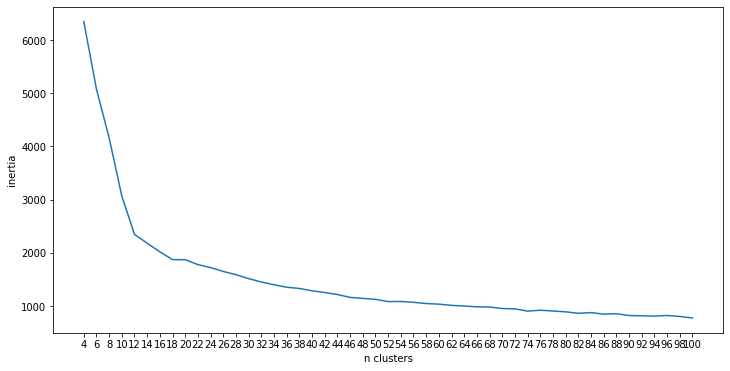

In [7]:
fig = plt.figure(figsize=(12, 6))
plt.plot(x, y)
plt.xlabel("n clusters")
plt.ylabel("inertia")
plt.xticks(x)
plt.show()

Let's use n_clusters=18

In [13]:
nmf = NMF(n_components=12, init='nndsvd', max_iter=500)
kmeans = KMeans(n_clusters=18)
norm = Normalizer()
pipeline = make_pipeline(nmf, norm, kmeans)
pipeline.fit(csr_mat)
labels = pipeline.predict(csr_mat)
labels[:5]

array([ 8,  7, 13,  7,  4])

In [14]:
df['label'] = labels

In [15]:
df[['content', 'label']][df.label == 1]

,content,label
13,"kalo anda cuma ngaku, orang gila di pinggir jalan juga bisa, masalahnya itu metodologinya, dari mana anda tau kalo ahmadiyah itu benar? udah lulus pengujian?",1
58,"Mau tau brp korbanya dan kasusnya fpi apa ?\nKasus ahmadiyah brp korban yg meninggal saat itu ? Ada 4 orang dan puluhan luka""\nKasus penutupan gereja dibandung dan pelarangan ibadah. Loe kira mereka tdk jd korban ?\nPenutupan an pengerusakan warung mkn it loe kira tdk ada korban",1
126,Tidak hanya konflik FPI di Monas dan dengan Ahmadiyah tapi juga di daerah lain salah satunya di Kendal yang mengakibatkan 1 orang tewas. Ini benar² kejahatan kemanusiaan.,1
141,Emang judulnya saya gak suka sama ini orang kok. Apalagi baru tau dia orang turunan Ahmadiyah. Tambah gak senengnya wkwkwkk\nMakasih om. Infonya,1
221,"Ga heran si, orang tuanya berdomisili di sekitar kuil Ahmadiyah, Sukaluyu",1
...,...,...
13242,Persekusinya berlanjut hingga malam hari. Mereka sengaja meminta jemaat yang laki2 untuk keluar. Saya curiga tujuannya untuk mengulang TRAGEDI CIKEUSIK terhadap jemaat ahmadiyah yg memakan korban.\n\nDi negeri ini memang banyak SETAN HAUS DARAH!,1
13434,"Syi'ah, Ahmadiyah orang orang tersesat teman sepermainan rezim..",1
13477,"Sekalipun kemudian pernyataan ini beliau bantah dgn menyatakan akan memfasilitasi dialog utk melindungi hak-hak mayoritas dan minoritas[5], tetapi sikap beliau menerima delegasi Ahmadiyah sebelum dilakukan dialog, dapat diartikan sebagai bentuk dukungan.\n#WaspadaModerasiBeragama",1
13531,Walau Pernah Membantah ...Pakistan Acapkali dituduh Sebagai Arsitek Terbentuknya Orang Orang Taliban Lewat Madrasah2 Disana.Faktanya Udah seringkali Kita Dengar Berita Pem Boman Di Pakistan... Dulu Peristiwa Seperti Ini Pernah Terjadi Di Pandeglang terhadap Umat Ahmadiyah.,1


In [16]:
df[['content', 'label']][df.label == 2]

,content,label
7,"banyak juga yaa. ini kalo di islam semacam nu, muhammadiyah, ahbandiyah, ahmadiyah, ldii dsb gitu gak sih?",2
11,"solat istikharah adalah solat untuk meminta petunjuk kepada Allah mana yang terbaik. banyak yg masuk Islam Ahmadiyah karena solat istikharah, artinya Islam Ahmadiyah memang yang terbaik di mata Allah. anda menolak ahmadiyah karena petunjuk Allah? atau hawa nafsu? belum dijawab",2
14,"solat istikharah adalah solat untuk meminta petunjuk kepada Allah mana yang terbaik. banyak yg masuk Islam Ahmadiyah karena solat istikharah, artinya Islam Ahmadiyah memang yang terbaik di mata Allah. Lalu anda menolak ahmadiyah karena petunjuk Allah? atau hawa nafsu?",2
15,"Mirza ghulam ahmad,seorang tokoh robbaniawan islam dari Qadian ,India. Dia adalah pendiri sebuah gerakan keagamaan dalam islam,Ahmadiyah. Dia mengaku telah dipilih Allah Ta'ala sebagai Al-Mahdi dn juga Al-Masih atau atau Mesias yg dijanjikan.serta sebagai Mujadid islam abad k-14",2
16,Klw begitu Ahmadiyah Islam donk?,2
...,...,...
13436,"intolernasi, islamphobia, phobia syariat islam, phobia atribut islam, syiah, ahmadiyah, kristenisasi, pki,.liberalisme, sekulerisme semua merusak dan membuat masy jd pecah,polarisasi dan negatif dan toxic.",2
13493,"bakalan semakin Anti Arab? semakin Pro (Islam) Nusantara aka Moderasi Beragama, Sepilisme, Syiah, Ahmadiyah, Islam Jamaah, Bahai dan Zionis Yahudi?#podhobaeSAS?",2
13540,Mantan Dai Ahmadiyah Bercerita Kenapa Ia Bertaubat Kembali ke Islam https://youtu.be/0z7MYl_1VT8 lewat \n@YouTube,2
13556,"Ahmadiyah jelas² syahadat ny beda, jadi bukan islam. Syiah mengingkari sahabat dan memusuhi keluarga & keturunan nabi ya jelas bukan islam.\n\nKlo pola pikir mereka mereka islam lu salah. Klo pola pikir mereka ""merasa benar"" itu betul.",2


In [17]:
df[['content', 'label']][df.label == 3]

,content,label
12,"kalo ahmadiyah benar harusnya saya org pertama yg masuk ahmadiyah, kenyataannya saya menolak paham ahmadiyah",3
30,"selain itu juga, orang2 masuk ahmadiyah karena memang ingin meningkatkan ketakwaannya, salah satunya adalah dengan membiasakan anggota untuk bertahajud..",3
57,"https://ahmadiyah.id/khotbah/kisah-orang-yang-masuk-islam-melalui-ahmadiyah… coba baca ini, banyak orang masuk ahmadiyah karena istikharah dan meminta petunjuk kepada Allah. jadi Ahmadiyah memang buatan Allah Ta'ala melalui Ahmad (as) sebagai ALmasih yang dijanjikan",3
75,Lebih ke ahmadiyah gak sih?,3
81,"engga, inggris ga ada hubungannya sama Ahmadiyah..",3
...,...,...
13552,"Fyi\nMembela ahmadiyah bukan berarti membenarkan ahmadiyah..\n\nDukung ruu pks \nDi cap pro zina\n\nMembela hak2 lgbt bukan berarti membenarkan orientasi sex ""menyimpangnya""\n\nKita ini sering salah paham dan gagal paham...",3
13554,"Fyi\nMembela ahmadiyah bukan berarti membenarkan ahmadiyah..\n\nDukung ruu pks \nDi cap pro zina\n\nMembela hak2 lgbt bukan berarti membenarkan orientasi sex ""menyimpangnya""\n\nKita ini sering salah paham dan gagal paham...",3
13565,"(kaum minoritas) hanya karena mereka percaya mereka akan masuk surga. keberanian penulis menggabungkan dua isu sensitif yaitu Ahmadiyah dan LGBT juga bikin aku ... akajsjwjs gatau deh mau ngetik apa lagi. pokonya buku ini worth to read bgtt mungkin bacaanku kurang jauh, tapi-",3
13569,Belajar lah dengan ALIM ULAMA SOLEH dari kalangan Kyai/Gus/Habib Ahlussunnah wal Jama'ah. Jangan belajar dari Ulama Su'/Syi'ah/Ahmadiyah/Wahabi. \n@tni_ad\n@IBNUHUSEINATS\n @ali_hasan110\n @mr_banan12\n @abubakarsegaf\n @NovalAssegaf\n @ustad_alhabsyi\n @ustsegafbaharun,3


In [18]:
df[['content', 'label']][df.label == 4]

,content,label
4,"itu video udh video udh menjelaskan penafsiran ahmadiyah soal Al-Azhab : 40 , malah dibilang ga bisa jelasin ok kalau ada pertanyaan soal kenabian lagi bisa pm aja ya",4
18,Yang Cucunya pendakwah Ahmadiyah itu ya teh,4
40,"Cabang syiah, cabang ahmadiyah, cabang lia eden ada gak ya ??",4
43,"kalau ahmadiyah sih sama dimana2, tapi saya kurang tau ya kalau soal syiah,",4
66,"ya itu kan di menurut kacamata anda. makanya sebaiknya anda konfirmasi ke Allah melalui istighfar, shalawat, dan istikharah. apakah benr ahmadiyah itu jalan dari Allah untuk mengembalikan kemurnian Islam. kalau ternyata benar, tapi anda menolaknya, nanti di akhirat menyesal",4
...,...,...
13534,Perilaku orang2 Pakiatan ini hampir mirip yang dilakukan kelompok ormas ketika menghakimi kelmpok Ahmadiyah disini bisa juga ke Syiah. Bersyukurnya di Indonesia masih ada UUD45 dan Pancasila kl dua itu tdk ada ya habislah ... krn apa2 main bunuh,4
13551,makanya tabayyun dulu. ahmadiyah syahadatnya sama ya,4
13559,"Sulit dibuktikan, tetapi sebagaimana yg sering terjadi di belahan negara lain, bahwa, semua keributan ini tak terlepas dari kepentingan globalis jahat dan GEDIBAL lokal. \n\nAhmadiyah & Syiah Sampang adalah contoh korban, yang lainya ya Ahok & 212.",4
13601,Tuhannya Islam satu Tuhannya Yahudi satu Tuhannya Kristen 1 Tuhannya Budha satu Tuhannya Hindu satu Tuhannya Konghucu satu Tuhannya Ahmadiyah 1 Tuhannya Suni 1 Tuhannya Syiah 1.. Tuhan banyak ya,4


In [30]:
csr_mat

<13605x20565 sparse matrix of type '<class 'numpy.float64'>'
	with 176594 stored elements in Compressed Sparse Row format>

## Upcoming question/task
### What are the most important words in each cluster?